# 1. Decision Stump

In [ ]:
# Let allow this notebook to acces to our Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Now Let import the important library

import sys, os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## 1.1 Get and load the data

In this section, we have to upload the train dataset and load the relevant columns in one dataframe

In [ ]:
# Now let upload the Data 

path_train_dataset = "../content/gdrive/MyDrive/Colab_Notebook/AIMS_ML/ATLAS_higgs_train.csv" 

df_train = pd.read_csv(path_train_dataset) 

df_train.head()

,Z1mass,Z2mass,detajj,massjj,l1pdgid,l1eta,l1phi,l1pt,l2pdgid,l2eta,...,l2pt,l3pdgid,l3eta,l3phi,l3pt,l4pdgid,l4eta,l4phi,l4pt,sample
0,68.515258,57.174385,4.283580,556.406882,-11,0.490221,-2.302279,68.776711,-11,0.910430,...,50.775758,11,-0.495413,-1.409834,28.700672,11,0.542029,-0.328558,17.054512,1
1,84.330551,25.551337,1.101106,266.768190,-11,1.291437,1.917571,77.658719,11,0.142028,...,61.922754,-13,0.208367,1.411837,30.645279,13,1.380638,0.300915,8.034711,-1
2,90.902327,30.404745,2.394863,211.879331,-13,0.702544,-0.946013,91.046750,13,0.958006,...,32.417166,11,0.385190,0.934649,17.942230,-11,0.672241,-1.410558,14.799019,-1
3,91.129112,26.609989,1.040268,56.235126,-11,-2.450392,3.123466,58.988305,11,-1.276226,...,30.001736,-13,-1.275654,0.280533,12.816265,13,-2.283192,-2.326921,11.448904,1
4,87.525977,32.304742,3.674720,351.241850,11,-1.303559,0.963711,66.502133,-11,-0.254885,...,26.519908,-13,-1.052104,0.041387,22.981393,13,0.099710,1.758643,12.038583,1


In [ ]:
# Now let load the relevant columns in to DataFrame 
# the important feature for this exercice are: detajj and massjj and sample

detajj = "detajj"
massjj = "massjj"
sample = "sample"
input_feature = [detajj, massjj, sample]

X_train = df_train[input_feature]
 
# Let see the first row of our Dataframe contining the relevant columns.  
X_train.head()

,detajj,massjj,sample
0,4.283580,556.406882,1
1,1.101106,266.768190,-1
2,2.394863,211.879331,-1
3,1.040268,56.235126,1
4,3.674720,351.241850,1


<font color='red'>Data correctly loaded.</font>

In [ ]:
import os, sys
import pandas as pd
import numpy as np

# set a seed to ensure reproducibility
seed = 42
rnd  = np.random.RandomState(seed)

# Matplotlib plotting settings
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline
print('matplotlib version: {}'.format(mp.__version__))

FONTSIZE = 16
params = {
         'axes.labelsize': FONTSIZE,
         'axes.titlesize': FONTSIZE,
         'xtick.labelsize':FONTSIZE,
         'ytick.labelsize':FONTSIZE}
plt.rcParams.update(params)

matplotlib version: 3.2.2


In the next three cells, we are going to plot using our features to see and have the ideas on the behaviour of our data. 

This task is not part of the assignment issue. But it seems very useful to us, to see what our data looks like. 


In [ ]:
# GLOBAL VARIABLES
XNAME = 'detajj'; XLABEL = r'$|\Delta\eta_{jj}|$'
YNAME = 'massjj'; YLABEL = r'$m_{jj}$ (GeV)'

inputs= [XNAME, YNAME] ;

XBINS = 5 ; XMIN = 0 ; XMAX = 5    ; XSTEP = 1
YBINS = 5 ; YMIN = 0 ; YMAX = 1000 ; YSTEP = 200

In [ ]:
def plot_scatter(sig, bkg, 
              xname=XNAME, xlabel=XLABEL, xmin=XMIN, xmax=XMAX, xstep=XSTEP,
              yname=YNAME, ylabel=YLABEL, ymin=YMIN, ymax=YMAX, ystep=YSTEP,
              fgsize=(6, 6), ftsize=FONTSIZE, alpha=0.3, title="Scatter plot"):
  
  fig, ax = plt.subplots(figsize=fgsize)

  # Annotate x-axis
  ax.set_xlim(xmin, xmax)
  ax.set_xlabel(xlabel)
  ax.set_xticks(np.arange(xmin, xmax+xstep, xstep))

  # Annotate y-axis
  ax.set_ylim(ymin, ymax)
  ax.set_ylabel(ylabel)
  ax.set_yticks(np.arange(ymin, ymax+ystep, ystep))

  # Scatter signal and background:
  ax.scatter(sig[xname], sig[yname], marker='o', s=15, c='b', alpha=alpha, label='VBF')
  ax.scatter(bkg[xname], bkg[yname], marker='*', s= 5, c='r', alpha=alpha, label='ggf')

  # Legend and plot:
  ax.legend(fontsize=ftsize, bbox_to_anchor=(1.04, 0.5), loc="center left", frameon=False) 
  ax.set_title(title, pad=20)
  plt.show()

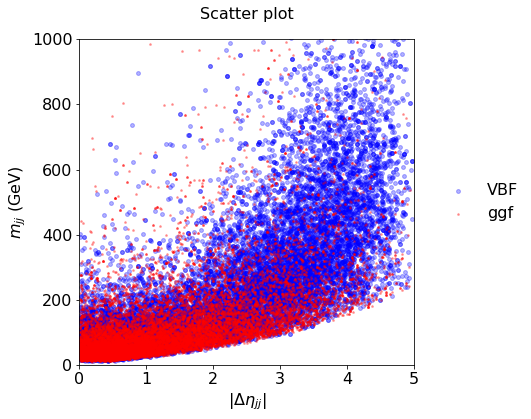

In [ ]:
plot_scatter(X_train.loc[X_train["sample"]==1],X_train.loc[X_train["sample"]==-1])

##1.2 Computing of the Gini index

In this section, we have to compute the gini index. Recall that, the Gini’s index measuring the impurity is defined as:
$$G_i = 1 - \sum_{k=1}^{N_{classe}}\,(\dfrac{N_{k,i}}{N_i})^2 $$

In [ ]:
def gini_index(df, x_feature, threshold):
  if len(df)== 0:
    print("DataFrame empty, please enter the correct DataFrame")
  else:
    block1 = df.loc[df[x_feature] <= threshold] # Here we create the left node given the condition threshold
    block2 = df.loc[df[x_feature] > threshold]  # Here we create the right node given the condition threshold

    if (len(block1)==0):  # we secure your code to prevent a division by zero.
      gini_left = 0 

    else: 
      num_bkg_block1 = len(block1.loc[block1["sample"]==-1]) # here we count all the backgroung in the left node 
      num_sig_block1 = len(block1.loc[block1["sample"]== 1]) # here we count all the signal in the right node
      gini_left =1-(num_bkg_block1/len(block1))**2 -(num_sig_block1/len(block1))**2 # Now we compute the gini left

    if(len(block2)==0):
      gini_right = 0 

    else:
      num_bkg_block2 = len(block2.loc[block2["sample"]==-1]) # here we count all the backgroung in the right node 
      num_sig_block2 = len(block2.loc[block2["sample"]==1])  # here we count all the signal in the right node
      gini_right =1-(num_bkg_block2/len(block2))**2 -(num_sig_block2/len(block2))**2 # here we compute the gini right 

  gini_liste = [gini_left, gini_right] # Liste containing the gini left and tha gini right
   
    

  return {'gini':gini_liste, 'node_left':block1, 'node_right':block2} # Our function return the two gini and the two node

<font color='red'>Interesting but is this level of complexity necessary? There is a much simpler way of writing this code. Please review the solution.</font>

Now let do some test of our gini_index function: 

In [ ]:
# here we will use the feature "massjj" and the threshold 214.233 like in the tutorial 2
Gini = gini_index(X_train, 'massjj', 214.233)

In [ ]:
Gini['gini']  # As we can see, we get the same gini_left and gini_right as in the tutorail 2

[0.4830228705287417, 0.3862676759079171]

In [ ]:
def cost_function(df, x_k, threshold):

  ginik = gini_index(df, x_k, threshold)

  ratio_left = (len(ginik['node_left']) / (len(ginik['node_left']) + len(ginik['node_right']))) 

  ratio_right = (len(ginik['node_right']) / (len(ginik['node_left']) + len(ginik['node_right'])))

  cost = (ratio_left* ginik['gini'][0]) + (ratio_right* ginik['gini'][1])

  return cost

 Now let test our cost function using the feature "massjj" and the same threshold 214.233 as in the tutorial 2

In [ ]:
cost_function(X_train,"massjj",214.233) ## We can see we get the same cost like in the tutorial 2

0.4560585800049839

## 1.4 Main function: Decision Stump

In [ ]:
# our decision_stumper function take in parameter the DataFrame and given feature. 
def decision_stumper(df, x_k):
  start_point = df[x_k].min()        # The start point to swiping the threshold in the interval of feature 
  end_point = df[x_k].max()          # The end point to swiping the threshold in the interval of feature
  h_step = (end_point - start_point)/end_point # Here is the step of discretisation of feature interval 

  cost = 1 # Here we initialise of cost to 1, becaus we will use this to do the comparaison and updating

  for threshold in np.arange(start_point, end_point,h_step):
    cost_new = cost_function(df, x_k, threshold)  
    if(cost_new < cost):
      cost = cost_new  # We update the cost
      new_threshold = threshold  # we update the threshold
  return [new_threshold, cost]  # Our decision_stumper function, retrun the Optimized threshold and the cost associate. 



In [ ]:
# Let test our decision_stumper_function on the feature 'detajj'
decision_stumper(X_train, "detajj")  

[3.0000091761784433, 0.4686525456400057]

In [ ]:
# Now let test the function for the feature "massjj"
decision_stumper(X_train, "massjj")

[219.44608375751963, 0.45617922925055754]

As we can see in the two cell above, the result of test of our function, decision_stumper on the feature "massjj" is very close (219.4460 for the optimized threshold and 0.4561 for the cost) to what we got in the tutorial 2. 

<font color='red'>Nice try! But your code is not producing the expected output. Please review the solution.</font>

### Final decision from our function decision_stumper. 

Here our aim is to call the decision_stumper with each feature and conclude what is the best stump with the optimized threshold. 

To achieve that, we want are going to define the function final_decision given by: 

In [ ]:
def final_decision(df, x_k1, x_k2):
  decision_1 = decision_stumper(df, x_k1)
  decision_2 = decision_stumper(df, x_k2)

  if (decision_1[1] <= decision_2[1]):
    print("#######################################################################################################################################")
    print("The best final cut is following the feature", x_k1, "at the threshold %.4f" % decision_1[0], 'and the error associate is %.4f'% decision_1[1])
    print("#######################################################################################################################################")  
    return decision_1  
  else:
     print("#######################################################################################################################################")
     print("The best final cut is following the feature", x_k2, "at the threshold %.4f" % decision_2[0], 'and the error associate is %.4f'% decision_2[1])  
     print("#######################################################################################################################################")
     return decision_2

In [ ]:
# Now let test our function final_decision and see what is the final conclusion. 

final_decision(X_train, "detajj", "massjj")

#######################################################################################################################################
The best final cut is following the feature massjj at the threshold 219.4461 and the error associate is 0.4562
#######################################################################################################################################


[219.44608375751963, 0.45617922925055754]

<font color='red'>Good formatting!</font>

## 1.5 Plot the cut

Here, our aim is to use the plot_scatter function to plot the data with the optimized threshold.

We want are going to use the function plot_scatter where we just add the line corresponding to the optimized threshold. 

In [ ]:
def plot_scatter(sig, bkg, df, x_k1, x_k2, 
              xname=XNAME, xlabel=XLABEL, xmin=XMIN, xmax=XMAX, xstep=XSTEP,
              yname=YNAME, ylabel=YLABEL, ymin=YMIN, ymax=YMAX, ystep=YSTEP,
              fgsize=(6, 6), ftsize=FONTSIZE, alpha=0.3, title="Scatter plot"):
  
  fig, ax = plt.subplots(figsize=fgsize)

  # Annotate x-axis
  ax.set_xlim(xmin, xmax)
  ax.set_xlabel(xlabel)
  ax.set_xticks(np.arange(xmin, xmax+xstep, xstep))

  # Annotate y-axis
  ax.set_ylim(ymin, ymax)
  ax.set_ylabel(ylabel)
  ax.set_yticks(np.arange(ymin, ymax+ystep, ystep))

  # Scatter signal and background:
  ax.scatter(sig[xname], sig[yname], marker='o', s=15, c='b', alpha=alpha, label='VBF')
  ax.scatter(bkg[xname], bkg[yname], marker='*', s= 5, c='r', alpha=alpha, label='ggf')

  # Legend and plot:
  ax.legend(fontsize=ftsize, bbox_to_anchor=(1.04, 0.5), loc="center left", frameon=False) 
  ax.set_title(title, pad=20)
  
  
  # Let get the final optimized threshold
  opt_threshold = final_decision(df, x_k1, x_k2)

  # Let add the following command to draw the optimized treshold
  plt.axhline(y= opt_threshold[0], color='black', linestyle='-')

  plt.show()

#######################################################################################################################################
The best final cut is following the feature massjj at the threshold 219.4461 and the error associate is 0.4562
#######################################################################################################################################


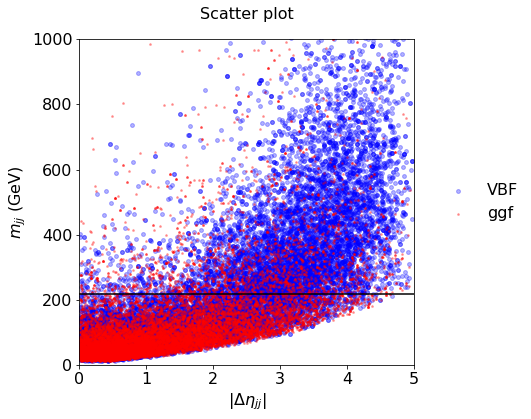

In [ ]:
# Let show our plot with the optimized final threshold

plot_scatter(X_train.loc[X_train["sample"]==1],X_train.loc[X_train["sample"]==-1], X_train, "massjj", "detajj")

<font color='red'>Nice attempt!</font>